# STUDENT DATA (Classify them by ratings they gave)

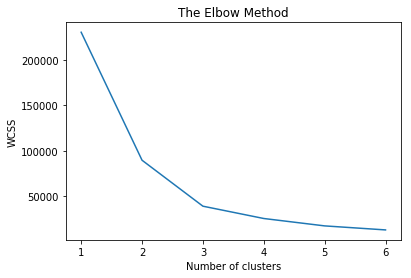

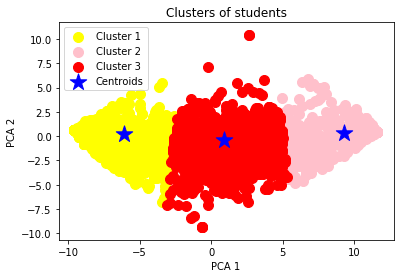

Counter({2: 2358, 0: 2222, 1: 1240})

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv('trk.csv')

#Lets try to cluster all the students based on the Question responses data.
dataset_questions = dataset.iloc[:,5:33]
dataset_questions.head()

#for feature dimensional reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

# KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)

#Plotting K Means
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow plot gave us suitable point i.e 3, so we can form 3 clusters
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(dataset_questions_pca)


# Visualising the clusters
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue',marker='*', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

#Looking at the above graph , i see we have 3 clusters of students who have given like Negative, Neutral and Positive feedback
# Let me check the count of students in each cluster
import collections
collections.Counter(y_kmeans)